# **DRUG TYPE CLASSIFICATION**

**Problem Statement**

Objective: To analyze the data on drugs and classify the drug type , also predict the drug type for new data.

Target Variable: Drug (Classification Type) , represents the type of variable.

**Project Summary**

To analyze the relationships between the independent features like Age,BP,Cholestserol levels etc and their impact on target label 'Drug'. To do that we do some EDA and Feature engineering.

**Importing Libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

The dataset was downloaded from kaggle.

In [19]:
df = pd.read_csv('/content/drug200.csv')

**Inspecting first five rows**

In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**Inspecting the columns and their datatypes**


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Numeric data types: Age and Na_to_K

Object type: Sex,BP,Cholesterol and Drug

**Inspecting the summary of numeric columns**

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


**Inspecting the number of rows and columns**

In [23]:
df.shape

(200, 6)

**Checking for null values**

In [24]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


# Univariate Analysis

**Inspecting Drug Column**

In [25]:
df.value_counts('Drug')

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugB,16
drugC,16


There are five types of drugs.

DrugY is mostly consumed drug followed by DrugX and the least is DrugB and DrugC

**Visualizing Drug Distribution**

<ipython-input-26-943cfb9080c5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Drug',palette='muted')


Text(0.5, 1.0, 'Drug Distribution')

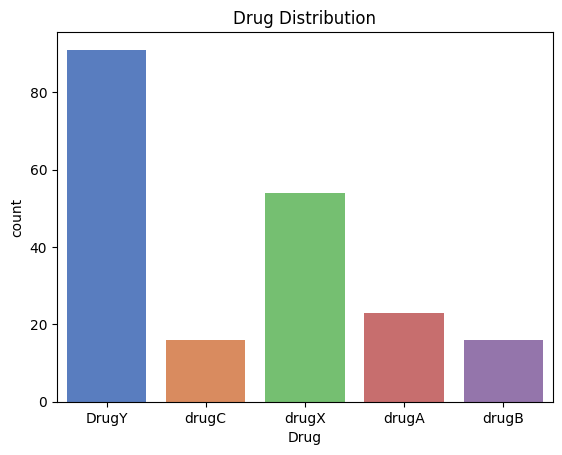

In [26]:
sns.countplot(data=df,x='Drug',palette='muted')
plt.title('Drug Distribution')

**Inspecting Cholesterol column: Visualization through Pie chart**

Text(0.5, 1.0, 'Distribution of Cholesterol')

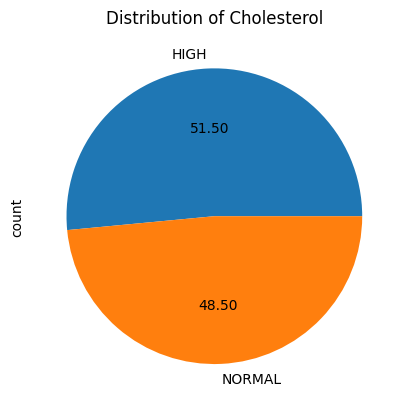

In [27]:
df.value_counts('Cholesterol').plot(kind='pie',autopct='%1.2f')
plt.title('Distribution of Cholesterol')

High Cholesterol : Composition of people with high cholesterol (51%) is more than those with Normal cholesterol.

**Inspecting BP feature: Visualization with pie chart**

Text(0.5, 1.0, 'Distribution of BP')

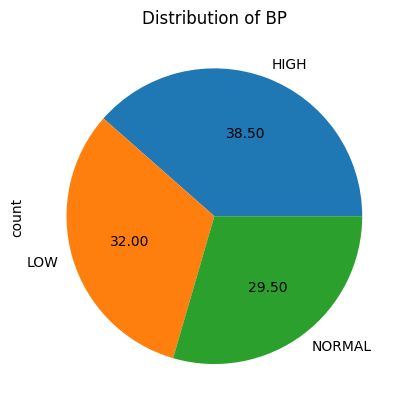

In [28]:
df.value_counts('BP').plot(kind='pie',autopct='%1.2f')
plt.title('Distribution of BP')

Composition of High BP (38%) is more followed by Low BP and Normal.

**Inspecting Sex feature:Visualization using pie chart**

Text(0.5, 1.0, 'Distribution of Gender')

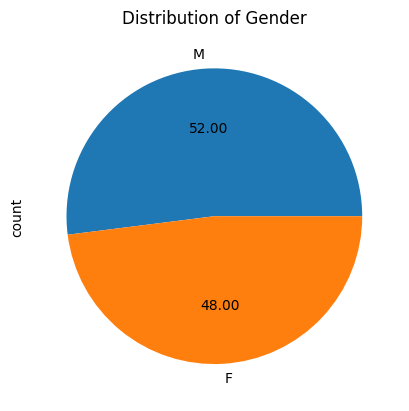

In [29]:
df.value_counts('Sex').plot(kind='pie',autopct='%1.2f')
plt.title('Distribution of Gender')

Composition of males is high about 52%.

# BIVARIATE ANALYSIS

**Age wise Drug Intake**

Text(0.5, 1.0, 'Drug Type vs Age')

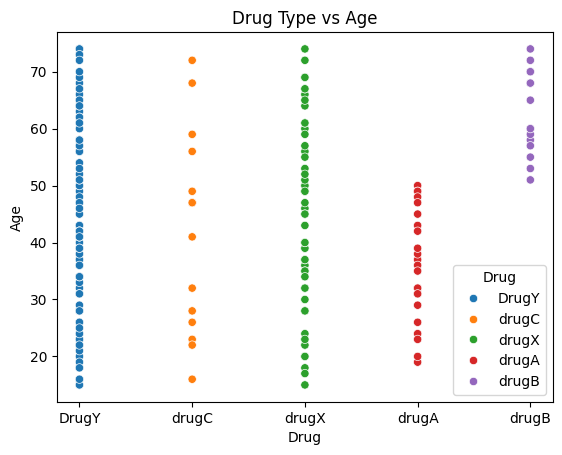

In [30]:
sns.scatterplot(data=df,x='Drug',y= 'Age',hue = 'Drug')
plt.title('Drug Type vs Age')

DrugY is mostly consumed drug by all age groups , followed by DrugX.

DrugA is consumed between ages ~20 and 50 years.

DrugB is consumed by ages >50 years.

**Gender wise Drug intake**

Text(0.5, 0, 'Gender')

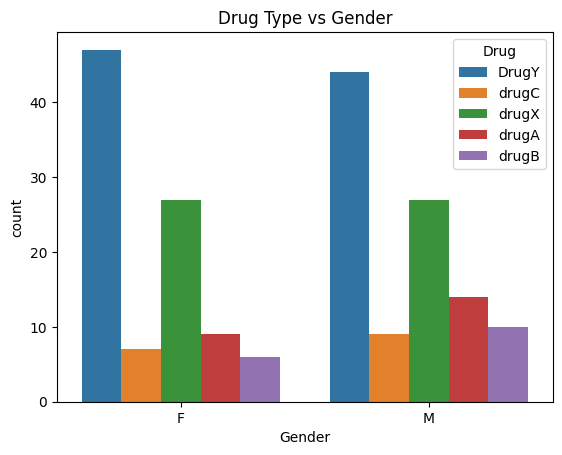

In [31]:
sns.countplot(data=df,x='Sex',hue = 'Drug')
plt.title('Drug Type vs Gender')
plt.xlabel('Gender')

DrugY is mostly consumed among both male sand females.

Consumption of other types is more among males than in females.

**BP impact on Drug type**

Text(0.5, 1.0, 'Drug Type vs BP')

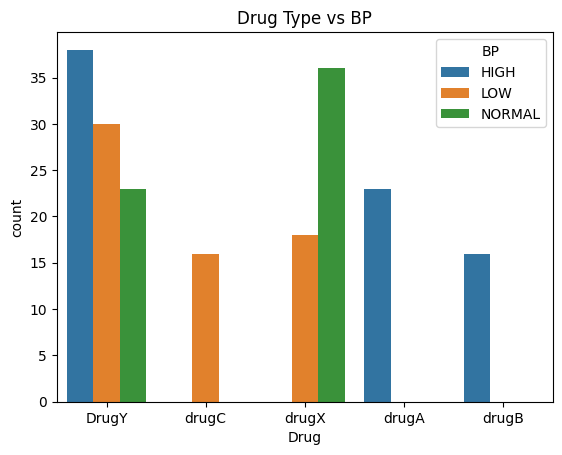

In [32]:
sns.countplot(data=df,x='Drug',hue = 'BP')
plt.title('Drug Type vs BP')

People with High BP consume mostly DrugY, people with Low BP consume mostly DrugY and people with Normal BP levels consume DrugX.

**Cholesterol level vs Drug Type**

Text(0.5, 1.0, 'Drug Type vs Cholesterol')

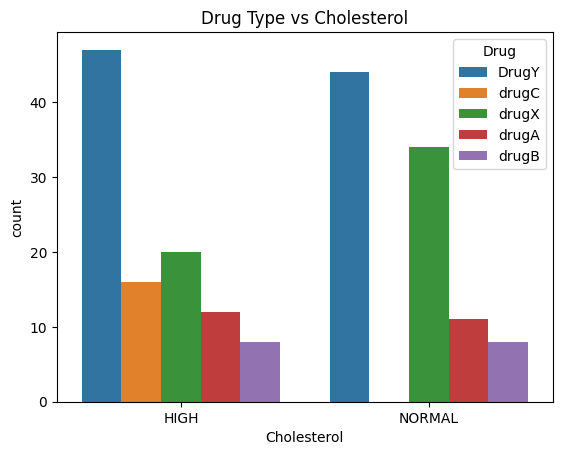

In [33]:
sns.countplot(data=df,x='Cholesterol',hue = 'Drug')
plt.title('Drug Type vs Cholesterol')

High Cholesterol:Take mostly DrugY type , followed by drug x.

Normal Cholesterol: Take mostly DrugY and they do not consume DrugC.

**Na_to_K (Sodium to Potassium ratio) content in Drug Type**

Text(0.5, 1.0, 'Drug Type vs Na_to_K')

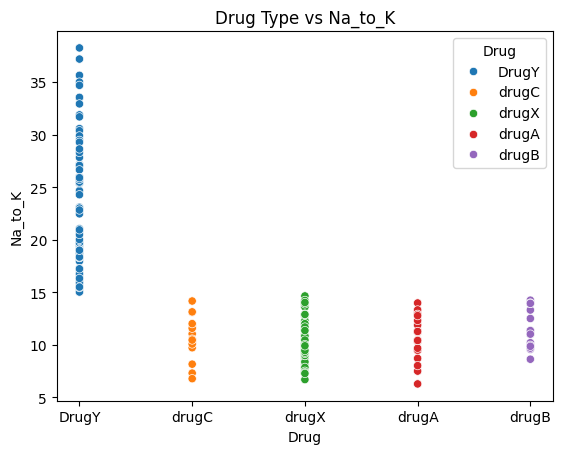

In [34]:
sns.scatterplot(data=df,x='Drug',y= 'Na_to_K',hue = 'Drug')
plt.title('Drug Type vs Na_to_K')

Sodium to potassium ratio is more in DrugY compared to other types.

# Inspecting Numerical features Age and Na_to_K

<Axes: >

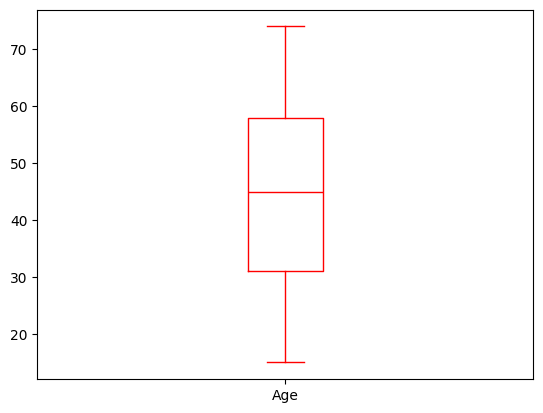

In [35]:
df['Age'].plot(kind='box',color='red')

There are no outliers in Age column.

<Axes: >

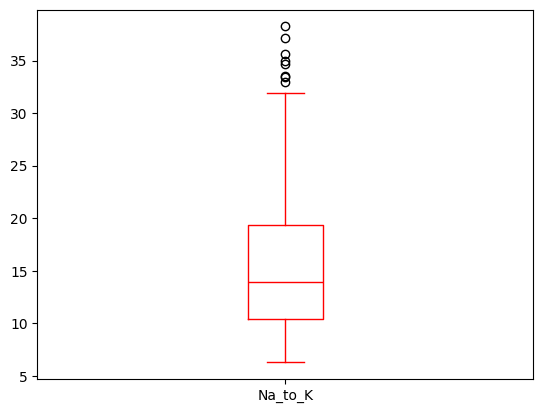

In [36]:
df['Na_to_K'].plot(kind='box',color='red')

Na_to_K has outliers and we need to deal with them.

<Axes: xlabel='Na_to_K', ylabel='Count'>

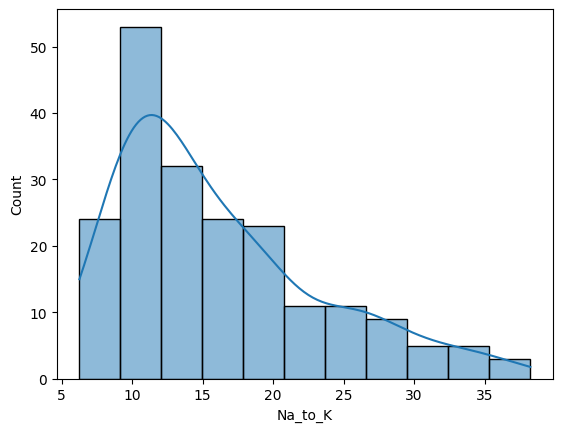

In [37]:
sns.histplot(data = df,x='Na_to_K',kde=True)

Let us deal with outliers using IQR.

In [38]:
q1 = df['Na_to_K'].quantile(0.25)
q3 = df['Na_to_K'].quantile(0.75)
iqr = q3 - q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

df = df[(df['Na_to_K'] >= lower) & (df['Na_to_K'] <= upper)]

<Axes: >

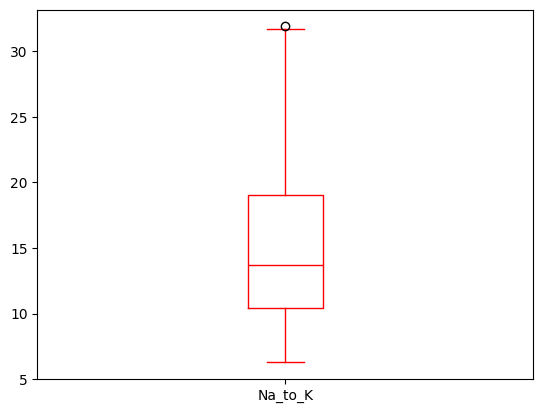

In [39]:
df['Na_to_K'].plot(kind='box',color='red')

There is one outlier which is not a problem.

# Feature Engineering

**Encoding Categorical Features**

Using Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])


In [41]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [42]:
df.value_counts('Sex')

,count
Sex,
1,100
0,92


1 - Males    0- Females


In [43]:
df.value_counts('BP')

,count
BP,
0,73
1,60
2,59


0-High   1-Low  2-Normal

In [44]:
df.value_counts('Cholesterol')

,count
Cholesterol,
0,99
1,93


0-High  1-Normal

**Feature Scaling: Standard Scaler**

In [45]:
from sklearn.preprocessing import StandardScaler

target = 'Drug'
scaler = StandardScaler()
feature_columns = [col for col in df.columns if col != target]
df[feature_columns] = scaler.fit_transform(df[feature_columns])


In [46]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.295480,-1.042572,-1.122453,-0.969223,1.626227,DrugY
1,0.157678,0.959166,0.088283,-0.969223,-0.355498,drugC
2,0.157678,0.959166,0.088283,-0.969223,-0.836949,drugC
3,-0.992739,-1.042572,1.299019,-0.969223,-1.211250,drugX
4,1.005353,-1.042572,0.088283,-0.969223,0.444497,DrugY


# Train-Test-Split

In [47]:
y = df['Drug']
X = df.drop(columns = 'Drug')
print(y)

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 192, dtype: object


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 5)
(153,)
(39, 5)
(39,)


# Model Fitting

In [50]:
from sklearn.linear_model import LogisticRegression

Lg = LogisticRegression()
Lg.fit(X_train, y_train)

y_predict = Lg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_predict))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

       DrugY       0.89      0.94      0.91        17
       drugA       1.00      1.00      1.00         4
       drugB       0.67      1.00      0.80         2
       drugC       1.00      0.83      0.91         6
       drugX       1.00      0.90      0.95        10

    accuracy                           0.92        39
   macro avg       0.91      0.93      0.91        39
weighted avg       0.93      0.92      0.92        39



By fitting the Logistic Regression , we get an accuracy of 92%

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the model
clf = clf.fit(X_train,y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Accuracy checking
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
